In [23]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
fruits=pd.read_table("fruit_data_with_colors.txt")

In [22]:
fruits.tail(10)

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
49,4,lemon,unknown,132,5.8,8.7,0.73
50,4,lemon,unknown,130,6.0,8.2,0.71
51,4,lemon,unknown,116,6.0,7.5,0.72
52,4,lemon,unknown,118,5.9,8.0,0.72
53,4,lemon,unknown,120,6.0,8.4,0.74
54,4,lemon,unknown,116,6.1,8.5,0.71
55,4,lemon,unknown,116,6.3,7.7,0.72
56,4,lemon,unknown,116,5.9,8.1,0.73
57,4,lemon,unknown,152,6.5,8.5,0.72
58,4,lemon,unknown,118,6.1,8.1,0.70


In [5]:
fruits.shape

(59, 7)

In [18]:
fruits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59 entries, 0 to 58
Data columns (total 7 columns):
fruit_label      59 non-null int64
fruit_name       59 non-null object
fruit_subtype    59 non-null object
mass             59 non-null int64
width            59 non-null float64
height           59 non-null float64
color_score      59 non-null float64
dtypes: float64(3), int64(2), object(2)
memory usage: 2.8+ KB


In [12]:
f1=dict(zip(fruits["fruit_label"].unique(),fruits["fruit_name"].unique()))

In [14]:
f1

{1: 'apple', 2: 'mandarin', 3: 'orange', 4: 'lemon'}

In [15]:
fruits.columns

Index(['fruit_label', 'fruit_name', 'fruit_subtype', 'mass', 'width', 'height',
       'color_score'],
      dtype='object')

In [52]:
X=fruits[['mass', 'width', 'height']]
y=fruits["fruit_label"]

X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0)

<IPython.core.display.Javascript object>


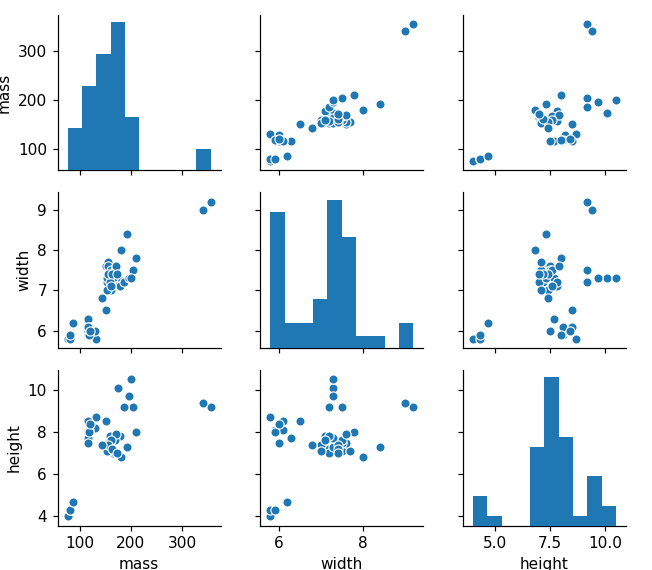

In [53]:
sns.pairplot(X_train)

<IPython.core.display.Javascript object>


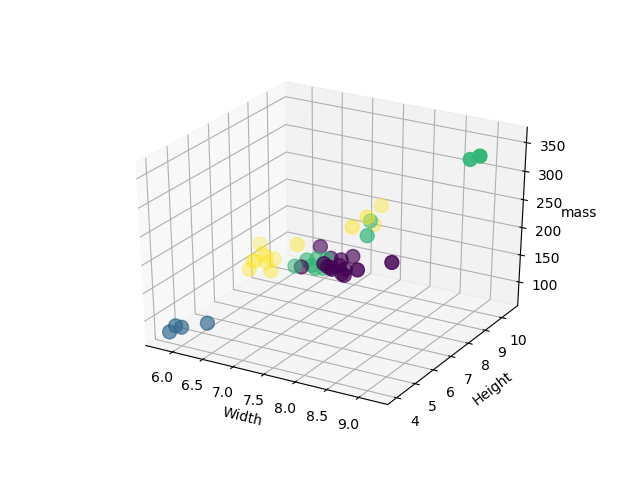

Text(0.5, 0, 'mass')

In [68]:
from mpl_toolkits.mplot3d import Axes3D

fig=plt.figure()
ax=fig.add_subplot(111,projection="3d")
ax.scatter(X_train["width"],X_train["height"],X_train["mass"],c=y_train,marker="o",s=100)
ax.set_xlabel("Width")
ax.set_ylabel("Height")
ax.set_zlabel("mass")

In [55]:
y_train.unique()

array([3, 4, 2, 1], dtype=int64)

In [56]:
from sklearn.neighbors import KNeighborsClassifier

In [57]:
knn=KNeighborsClassifier(n_neighbors=5)

In [58]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [59]:
knn.score(X_test,y_test)

0.5333333333333333

In [65]:
predict=knn.predict([[2,4.2,3]])
f1[predict[0]]

'mandarin'

<IPython.core.display.Javascript object>


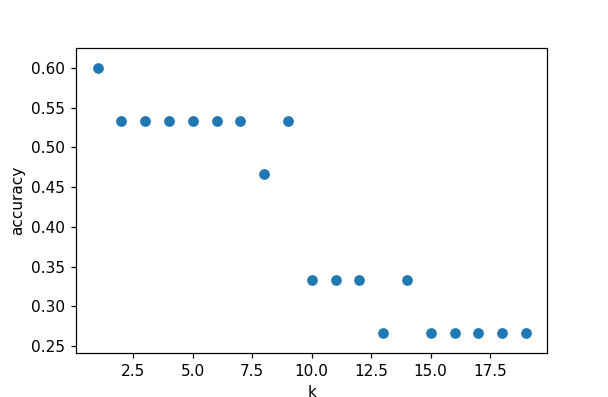

In [66]:
k_range=range(1,20)
scores=[]

for k in k_range:
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    scores.append(knn.score(X_test,y_test))
    
plt.figure()
plt.xlabel("k")
plt.ylabel("accuracy")
plt.scatter(k_range,scores)